# 6 학습 관련 기술들


### 6_1 매개변수 갱신

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr # lr learning rate(학습률) 
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
            


In [3]:
# 모멘텀 구현
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]
            
            

In [4]:
# AdaGrad 구현

class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = LR
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 1e-7이라는 작은 값이 0으로 나누는 사태를 막아준다.
            
        

===========iteration:0===========
SGD:2.3154958585211607
Momentum:2.4042152452740315
AdaGrad:2.13057303858469
Adam:2.243276954783315
===========iteration:100===========
SGD:1.4741139657070743
Momentum:0.34659363578750224
AdaGrad:0.0892559190142462
Adam:0.1862070740522718
===========iteration:200===========
SGD:0.949315864849533
Momentum:0.3082645126333177
AdaGrad:0.09679581978401014
Adam:0.16017718036180822
===========iteration:300===========
SGD:0.5433704125329849
Momentum:0.22053576858809298
AdaGrad:0.1078038030668184
Adam:0.16623873375825196
===========iteration:400===========
SGD:0.42833551666675684
Momentum:0.15198488061827042
AdaGrad:0.06528399048119746
Adam:0.12021223728395086
===========iteration:500===========
SGD:0.5440783205561391
Momentum:0.21336136830647265
AdaGrad:0.07682147623891236
Adam:0.17540850836599864
===========iteration:600===========
SGD:0.3964546777344842
Momentum:0.203872459622494
AdaGrad:0.07830553016249814
Adam:0.09152973136336523
===========iteration:700===

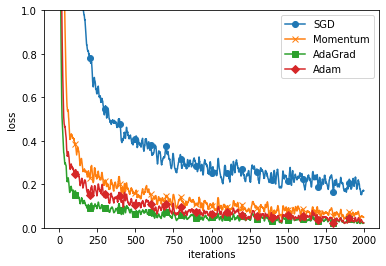

In [12]:

import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

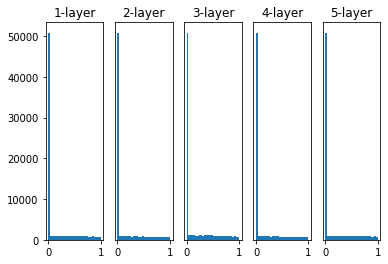

In [19]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    #w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    #z = sigmoid(a)
    z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3025180406924752
Xavier:2.2977283264063297
He:2.512522916624512
===========iteration:100===========
std=0.01:2.302757641514745
Xavier:2.2528610331022696
He:1.6831994549205314
===========iteration:200===========
std=0.01:2.301513814937345
Xavier:2.1167206653638546
He:0.8786487017599517
===========iteration:300===========
std=0.01:2.301485787282575
Xavier:1.8292903539787861
He:0.5070163750279586
===========iteration:400===========
std=0.01:2.2998844678065575
Xavier:1.3065432510989148
He:0.5833679746674332
===========iteration:500===========
std=0.01:2.302418598216186
Xavier:0.9074097933323164
He:0.3385588038461393
===========iteration:600===========
std=0.01:2.3011329618192233
Xavier:0.6209618308470226
He:0.23273337785324685
===========iteration:700===========
std=0.01:2.3033836666294216
Xavier:0.47137928966875475
He:0.20294404746231676
===========iteration:800===========
std=0.01:2.3017371463944256
Xavier:0.5800346341914249
He:0.3267471171861

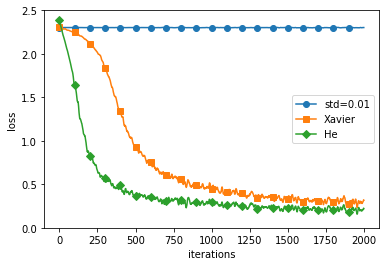

In [20]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from util import smooth_curve
from multi_layer_net import MultiLayerNet
from optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 6_3 배치 정규화

============== 1/16 ==============
epoch:0 | 0.097 - 0.091
epoch:1 | 0.116 - 0.083
epoch:2 | 0.116 - 0.12
epoch:3 | 0.116 - 0.148
epoch:4 | 0.116 - 0.163
epoch:5 | 0.116 - 0.177
epoch:6 | 0.116 - 0.202
epoch:7 | 0.116 - 0.22
epoch:8 | 0.116 - 0.227
epoch:9 | 0.116 - 0.252
epoch:10 | 0.116 - 0.269
epoch:11 | 0.116 - 0.276
epoch:12 | 0.116 - 0.294
epoch:13 | 0.116 - 0.309
epoch:14 | 0.116 - 0.315
epoch:15 | 0.116 - 0.335
epoch:16 | 0.116 - 0.351
epoch:17 | 0.116 - 0.363


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.373
epoch:19 | 0.116 - 0.393
============== 2/16 ==============
epoch:0 | 0.093 - 0.091


D:\AI\밑바닥\DeepLearning\layer.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
D:\AI\밑바닥\DeepLearning\multi_layer_net_extend.py:102: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
D:\AI\밑바닥\DeepLearning\multi_layer_net_extend.py:102: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.117
epoch:2 | 0.097 - 0.131
epoch:3 | 0.097 - 0.144
epoch:4 | 0.097 - 0.155
epoch:5 | 0.097 - 0.171
epoch:6 | 0.097 - 0.182
epoch:7 | 0.097 - 0.208
epoch:8 | 0.097 - 0.228
epoch:9 | 0.097 - 0.251
epoch:10 | 0.097 - 0.28
epoch:11 | 0.097 - 0.315
epoch:12 | 0.097 - 0.331
epoch:13 | 0.097 - 0.347
epoch:14 | 0.097 - 0.363
epoch:15 | 0.097 - 0.38
epoch:16 | 0.097 - 0.405
epoch:17 | 0.097 - 0.42
epoch:18 | 0.097 - 0.44


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.451
============== 3/16 ==============
epoch:0 | 0.108 - 0.109
epoch:1 | 0.406 - 0.139
epoch:2 | 0.569 - 0.135
epoch:3 | 0.661 - 0.164
epoch:4 | 0.715 - 0.223
epoch:5 | 0.786 - 0.258
epoch:6 | 0.85 - 0.299
epoch:7 | 0.867 - 0.326
epoch:8 | 0.895 - 0.356
epoch:9 | 0.937 - 0.382
epoch:10 | 0.958 - 0.413
epoch:11 | 0.972 - 0.452
epoch:12 | 0.98 - 0.475
epoch:13 | 0.984 - 0.499
epoch:14 | 0.99 - 0.525
epoch:15 | 0.994 - 0.545
epoch:16 | 0.996 - 0.571
epoch:17 | 0.997 - 0.588
epoch:18 | 0.997 - 0.614


No handles with labels found to put in legend.


epoch:19 | 0.998 - 0.627
============== 4/16 ==============
epoch:0 | 0.079 - 0.107
epoch:1 | 0.25 - 0.15
epoch:2 | 0.347 - 0.256
epoch:3 | 0.42 - 0.34
epoch:4 | 0.502 - 0.415
epoch:5 | 0.557 - 0.473
epoch:6 | 0.595 - 0.511
epoch:7 | 0.641 - 0.553
epoch:8 | 0.671 - 0.589
epoch:9 | 0.69 - 0.621
epoch:10 | 0.721 - 0.648
epoch:11 | 0.755 - 0.67
epoch:12 | 0.77 - 0.687
epoch:13 | 0.783 - 0.705
epoch:14 | 0.795 - 0.727
epoch:15 | 0.809 - 0.742
epoch:16 | 0.827 - 0.759
epoch:17 | 0.833 - 0.781
epoch:18 | 0.849 - 0.788


No handles with labels found to put in legend.


epoch:19 | 0.854 - 0.802
============== 5/16 ==============
epoch:0 | 0.113 - 0.088
epoch:1 | 0.122 - 0.129
epoch:2 | 0.13 - 0.314
epoch:3 | 0.139 - 0.455
epoch:4 | 0.157 - 0.524
epoch:5 | 0.169 - 0.572
epoch:6 | 0.188 - 0.617
epoch:7 | 0.211 - 0.676
epoch:8 | 0.23 - 0.71
epoch:9 | 0.238 - 0.739
epoch:10 | 0.244 - 0.75
epoch:11 | 0.262 - 0.777
epoch:12 | 0.263 - 0.788
epoch:13 | 0.267 - 0.808
epoch:14 | 0.274 - 0.826
epoch:15 | 0.282 - 0.84
epoch:16 | 0.282 - 0.85
epoch:17 | 0.276 - 0.865
epoch:18 | 0.273 - 0.871


No handles with labels found to put in legend.


epoch:19 | 0.281 - 0.874
============== 6/16 ==============
epoch:0 | 0.117 - 0.122
epoch:1 | 0.124 - 0.233
epoch:2 | 0.144 - 0.417
epoch:3 | 0.117 - 0.565
epoch:4 | 0.117 - 0.633
epoch:5 | 0.117 - 0.689
epoch:6 | 0.117 - 0.723
epoch:7 | 0.123 - 0.753
epoch:8 | 0.141 - 0.773
epoch:9 | 0.161 - 0.789
epoch:10 | 0.145 - 0.806
epoch:11 | 0.116 - 0.824
epoch:12 | 0.116 - 0.851
epoch:13 | 0.118 - 0.865
epoch:14 | 0.116 - 0.875
epoch:15 | 0.116 - 0.898
epoch:16 | 0.116 - 0.913
epoch:17 | 0.116 - 0.93
epoch:18 | 0.116 - 0.935


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.945
============== 7/16 ==============
epoch:0 | 0.105 - 0.068
epoch:1 | 0.117 - 0.304
epoch:2 | 0.117 - 0.601
epoch:3 | 0.117 - 0.68
epoch:4 | 0.117 - 0.738
epoch:5 | 0.117 - 0.776
epoch:6 | 0.117 - 0.825
epoch:7 | 0.117 - 0.848
epoch:8 | 0.117 - 0.877
epoch:9 | 0.117 - 0.904
epoch:10 | 0.117 - 0.925
epoch:11 | 0.117 - 0.947
epoch:12 | 0.117 - 0.96
epoch:13 | 0.117 - 0.967
epoch:14 | 0.117 - 0.974
epoch:15 | 0.117 - 0.984
epoch:16 | 0.117 - 0.984
epoch:17 | 0.117 - 0.988
epoch:18 | 0.117 - 0.99


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.991
============== 8/16 ==============
epoch:0 | 0.097 - 0.118
epoch:1 | 0.116 - 0.448
epoch:2 | 0.116 - 0.624
epoch:3 | 0.116 - 0.713
epoch:4 | 0.116 - 0.781
epoch:5 | 0.116 - 0.845
epoch:6 | 0.116 - 0.89
epoch:7 | 0.116 - 0.934
epoch:8 | 0.116 - 0.96
epoch:9 | 0.116 - 0.977
epoch:10 | 0.116 - 0.985
epoch:11 | 0.116 - 0.993
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.996
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.116 - 0.151
epoch:1 | 0.117 - 0.605
epoch:2 | 0.117 - 0.757
epoch:3 | 0.117 - 0.842
epoch:4 | 0.117 - 0.865
epoch:5 | 0.117 - 0.878
epoch:6 | 0.117 - 0.894
epoch:7 | 0.117 - 0.921
epoch:8 | 0.117 - 0.966
epoch:9 | 0.117 - 0.976
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.993
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.999
epoch:15 | 0.117 - 0.999
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.116 - 0.147
epoch:1 | 0.117 - 0.567
epoch:2 | 0.117 - 0.719
epoch:3 | 0.117 - 0.828
epoch:4 | 0.117 - 0.781
epoch:5 | 0.117 - 0.938
epoch:6 | 0.117 - 0.968
epoch:7 | 0.117 - 0.977
epoch:8 | 0.117 - 0.965
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.999
epoch:13 | 0.117 - 0.998
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.995


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.956
epoch:19 | 0.117 - 0.99
============== 11/16 ==============
epoch:0 | 0.105 - 0.151
epoch:1 | 0.099 - 0.55
epoch:2 | 0.116 - 0.681
epoch:3 | 0.117 - 0.773
epoch:4 | 0.117 - 0.737
epoch:5 | 0.116 - 0.919
epoch:6 | 0.116 - 0.745
epoch:7 | 0.116 - 0.942
epoch:8 | 0.116 - 0.965
epoch:9 | 0.116 - 0.957
epoch:10 | 0.116 - 0.977
epoch:11 | 0.116 - 0.978
epoch:12 | 0.116 - 0.986
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.991
epoch:15 | 0.116 - 0.991
epoch:16 | 0.116 - 0.994
epoch:17 | 0.116 - 0.992


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.995
epoch:19 | 0.116 - 0.995
============== 12/16 ==============
epoch:0 | 0.105 - 0.147
epoch:1 | 0.116 - 0.451
epoch:2 | 0.117 - 0.532
epoch:3 | 0.117 - 0.645
epoch:4 | 0.117 - 0.637
epoch:5 | 0.117 - 0.662
epoch:6 | 0.116 - 0.76
epoch:7 | 0.116 - 0.752
epoch:8 | 0.116 - 0.761
epoch:9 | 0.117 - 0.762
epoch:10 | 0.116 - 0.774
epoch:11 | 0.117 - 0.804
epoch:12 | 0.117 - 0.807
epoch:13 | 0.117 - 0.811
epoch:14 | 0.117 - 0.776
epoch:15 | 0.117 - 0.804
epoch:16 | 0.117 - 0.807
epoch:17 | 0.117 - 0.812


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.779
epoch:19 | 0.117 - 0.814
============== 13/16 ==============
epoch:0 | 0.087 - 0.097
epoch:1 | 0.116 - 0.43
epoch:2 | 0.116 - 0.565
epoch:3 | 0.117 - 0.582
epoch:4 | 0.117 - 0.556
epoch:5 | 0.116 - 0.595
epoch:6 | 0.116 - 0.59
epoch:7 | 0.116 - 0.61
epoch:8 | 0.117 - 0.597
epoch:9 | 0.117 - 0.667
epoch:10 | 0.116 - 0.686
epoch:11 | 0.116 - 0.694
epoch:12 | 0.116 - 0.706
epoch:13 | 0.116 - 0.71
epoch:14 | 0.117 - 0.712
epoch:15 | 0.117 - 0.708
epoch:16 | 0.117 - 0.71
epoch:17 | 0.117 - 0.712


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.721
epoch:19 | 0.117 - 0.714
============== 14/16 ==============
epoch:0 | 0.117 - 0.174
epoch:1 | 0.117 - 0.384
epoch:2 | 0.117 - 0.38
epoch:3 | 0.117 - 0.501
epoch:4 | 0.117 - 0.515
epoch:5 | 0.116 - 0.481
epoch:6 | 0.116 - 0.518
epoch:7 | 0.117 - 0.518
epoch:8 | 0.117 - 0.588
epoch:9 | 0.116 - 0.573
epoch:10 | 0.116 - 0.547
epoch:11 | 0.116 - 0.57
epoch:12 | 0.116 - 0.612
epoch:13 | 0.116 - 0.614
epoch:14 | 0.116 - 0.617
epoch:15 | 0.116 - 0.681
epoch:16 | 0.116 - 0.704
epoch:17 | 0.116 - 0.704


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.711
epoch:19 | 0.116 - 0.711
============== 15/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.117 - 0.387
epoch:2 | 0.116 - 0.397
epoch:3 | 0.116 - 0.476
epoch:4 | 0.117 - 0.478
epoch:5 | 0.116 - 0.502
epoch:6 | 0.116 - 0.51
epoch:7 | 0.116 - 0.497
epoch:8 | 0.116 - 0.48
epoch:9 | 0.116 - 0.513
epoch:10 | 0.116 - 0.529
epoch:11 | 0.116 - 0.523
epoch:12 | 0.116 - 0.512
epoch:13 | 0.116 - 0.502
epoch:14 | 0.116 - 0.518
epoch:15 | 0.116 - 0.522
epoch:16 | 0.116 - 0.525
epoch:17 | 0.116 - 0.5
epoch:18 | 0.116 - 0.519


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.527
============== 16/16 ==============
epoch:0 | 0.092 - 0.192
epoch:1 | 0.117 - 0.321
epoch:2 | 0.117 - 0.378
epoch:3 | 0.117 - 0.375
epoch:4 | 0.117 - 0.394
epoch:5 | 0.117 - 0.388
epoch:6 | 0.117 - 0.406
epoch:7 | 0.117 - 0.415
epoch:8 | 0.117 - 0.444
epoch:9 | 0.117 - 0.417
epoch:10 | 0.117 - 0.462
epoch:11 | 0.117 - 0.416
epoch:12 | 0.117 - 0.424
epoch:13 | 0.117 - 0.425
epoch:14 | 0.117 - 0.418
epoch:15 | 0.117 - 0.438
epoch:16 | 0.117 - 0.516
epoch:17 | 0.117 - 0.522
epoch:18 | 0.117 - 0.518
epoch:19 | 0.117 - 0.511


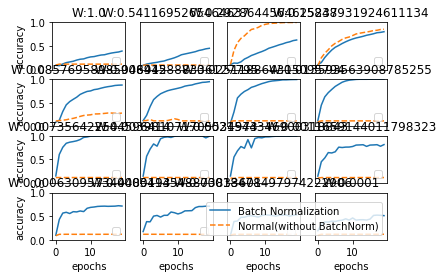

In [25]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net_extend import MultiLayerNetExtend
from optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

# 6_4 오버피팅



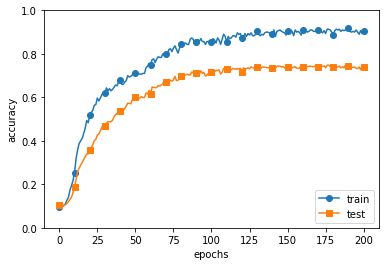

In [30]:
# 4_1 오버피팅 

import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import MultiLayerNet
from optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
# 오버피팅 재현하기 위해 학습 데이터 수 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

# 훈련 수행 코드
network = MultiLayerNet(input_size = 784, hidden_size_list=[100,100,100,100,100,100], output_size=10,  weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr = 0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
            
# 그래프
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [31]:
class Drouput:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, x , train_flg = True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
        
    def backward(self, dout):
        return dout * self.mask

train loss:2.3417606240184723
=== epoch:1, train acc:0.12666666666666668, test acc:0.1174 ===
train loss:2.353647845532537
train loss:2.3078073904027705
train loss:2.3324862473454404
=== epoch:2, train acc:0.14333333333333334, test acc:0.1217 ===
train loss:2.2870901136319968
train loss:2.280727360878168
train loss:2.276801375485983
=== epoch:3, train acc:0.15, test acc:0.1293 ===
train loss:2.2781773702746624
train loss:2.2871331977740708
train loss:2.270860032283953
=== epoch:4, train acc:0.16666666666666666, test acc:0.1376 ===
train loss:2.271109440533783
train loss:2.254716032625053
train loss:2.2373861961635244
=== epoch:5, train acc:0.19, test acc:0.1503 ===
train loss:2.245805364242087
train loss:2.2147254771339195
train loss:2.212346894637113
=== epoch:6, train acc:0.20666666666666667, test acc:0.1614 ===
train loss:2.2366545420959807
train loss:2.217446642266838
train loss:2.2182450775898577
=== epoch:7, train acc:0.21333333333333335, test acc:0.1659 ===
train loss:2.18071635

=== epoch:57, train acc:0.89, test acc:0.625 ===
train loss:0.47110466240512017
train loss:0.5571665068926653
train loss:0.6090583300952732
=== epoch:58, train acc:0.9, test acc:0.6471 ===
train loss:0.4737387787511279
train loss:0.506621931290862
train loss:0.5484585882536774
=== epoch:59, train acc:0.8866666666666667, test acc:0.6273 ===
train loss:0.5629440497918544
train loss:0.5164899238331259
train loss:0.48284040453767696
=== epoch:60, train acc:0.89, test acc:0.6471 ===
train loss:0.41650377772880826
train loss:0.6431156562144844
train loss:0.4955994515234665
=== epoch:61, train acc:0.8966666666666666, test acc:0.6498 ===
train loss:0.4196650246133718
train loss:0.4555795422195847
train loss:0.45312831753260546
=== epoch:62, train acc:0.8966666666666666, test acc:0.6583 ===
train loss:0.49089545155844233
train loss:0.48405819294067476
train loss:0.4592963947339236
=== epoch:63, train acc:0.8966666666666666, test acc:0.6612 ===
train loss:0.5484697273615787
train loss:0.49828219

=== epoch:111, train acc:0.9933333333333333, test acc:0.707 ===
train loss:0.11943476051978937
train loss:0.09569521551338621
train loss:0.13168556874959048
=== epoch:112, train acc:0.9933333333333333, test acc:0.7088 ===
train loss:0.13378506910563898
train loss:0.10549558804937592
train loss:0.10569049267387971
=== epoch:113, train acc:0.9933333333333333, test acc:0.7065 ===
train loss:0.09729415979521265
train loss:0.09187359707393318
train loss:0.11946871917607771
=== epoch:114, train acc:0.9966666666666667, test acc:0.71 ===
train loss:0.09791344371478278
train loss:0.115455326717494
train loss:0.09217812228205575
=== epoch:115, train acc:0.9933333333333333, test acc:0.7094 ===
train loss:0.10992379687128506
train loss:0.1043384758089557
train loss:0.07014277264784298
=== epoch:116, train acc:0.9933333333333333, test acc:0.7092 ===
train loss:0.08954576822795848
train loss:0.1058033095690611
train loss:0.08530426480346202
=== epoch:117, train acc:0.9966666666666667, test acc:0.709

=== epoch:165, train acc:1.0, test acc:0.7171 ===
train loss:0.033346969944521965
train loss:0.032709862556040366
train loss:0.04453383041553815
=== epoch:166, train acc:1.0, test acc:0.7183 ===
train loss:0.04067061740165188
train loss:0.03559748843012382
train loss:0.03869664794537092
=== epoch:167, train acc:1.0, test acc:0.7223 ===
train loss:0.03309217620873123
train loss:0.039437495508429114
train loss:0.03275808856296386
=== epoch:168, train acc:1.0, test acc:0.7195 ===
train loss:0.034150250216008156
train loss:0.029492280159242146
train loss:0.034159654555555814
=== epoch:169, train acc:1.0, test acc:0.7178 ===
train loss:0.038999038251246614
train loss:0.02416176353393962
train loss:0.02618703328359904
=== epoch:170, train acc:1.0, test acc:0.7194 ===
train loss:0.0338559734727049
train loss:0.023205156130107568
train loss:0.04106657727055609
=== epoch:171, train acc:1.0, test acc:0.7178 ===
train loss:0.038801044889841936
train loss:0.04600555742856059
train loss:0.032470632

=== epoch:222, train acc:1.0, test acc:0.7229 ===
train loss:0.020960237563841876
train loss:0.013732866171163684
train loss:0.02024408402243348
=== epoch:223, train acc:1.0, test acc:0.7219 ===
train loss:0.013812907840580028
train loss:0.015610966386288495
train loss:0.016342696530211538
=== epoch:224, train acc:1.0, test acc:0.7233 ===
train loss:0.015340080334083881
train loss:0.022495012116142146
train loss:0.016740671006359457
=== epoch:225, train acc:1.0, test acc:0.7231 ===
train loss:0.018448806974063196
train loss:0.01280866341474749
train loss:0.012882595898796973
=== epoch:226, train acc:1.0, test acc:0.7234 ===
train loss:0.016067443472585846
train loss:0.016747166713933913
train loss:0.014223145148982494
=== epoch:227, train acc:1.0, test acc:0.7228 ===
train loss:0.013439132626098147
train loss:0.017746674967768175
train loss:0.017218992488967813
=== epoch:228, train acc:1.0, test acc:0.7245 ===
train loss:0.013140424473871542
train loss:0.015881577860820544
train loss:0

=== epoch:279, train acc:1.0, test acc:0.7263 ===
train loss:0.009986088277790333
train loss:0.011730966179385197
train loss:0.012070491262318586
=== epoch:280, train acc:1.0, test acc:0.7266 ===
train loss:0.010414614559801052
train loss:0.011108946605990835
train loss:0.010437235434827751
=== epoch:281, train acc:1.0, test acc:0.7271 ===
train loss:0.01050481207579498
train loss:0.009530587167233304
train loss:0.009261713300665171
=== epoch:282, train acc:1.0, test acc:0.7253 ===
train loss:0.01386939679946533
train loss:0.010539669960185445
train loss:0.00950746970981332
=== epoch:283, train acc:1.0, test acc:0.7265 ===
train loss:0.011708819814600773
train loss:0.008899093494429444
train loss:0.011002352964309408
=== epoch:284, train acc:1.0, test acc:0.7262 ===
train loss:0.01352768176792962
train loss:0.00935364185417788
train loss:0.0109190056063814
=== epoch:285, train acc:1.0, test acc:0.7268 ===
train loss:0.00906680466580778
train loss:0.011285326265483881
train loss:0.00859

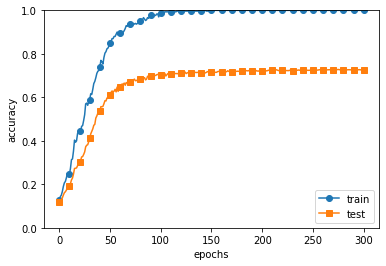

In [34]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net_extend import MultiLayerNetExtend
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 6_5 적절한 하이퍼파라미터 값 찾기

In [36]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터 뒤섞기
x_train, t_train = shuffle_dataset(x_train,t_train)

# 20% 를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

# shuffle_dataset은 np.random.suffle이용

NameError: name 'shuffle_dataset' is not defined

In [37]:
weight_decay = 10 ** np.random.uniform(-8,-4)
lr = 10 ** np.random.uniform(-6,-2)

val acc:0.41 | lr:0.002573773506265421, weight decay:2.7820910313543878e-06
val acc:0.12 | lr:2.4236525395866576e-06, weight decay:4.137372130405247e-06
val acc:0.1 | lr:1.0473054215402774e-06, weight decay:1.904337460702101e-05
val acc:0.13 | lr:0.00019721318154212358, weight decay:1.014633312601502e-06
val acc:0.09 | lr:8.974385064689245e-06, weight decay:1.2448890849724318e-07
val acc:0.08 | lr:2.2412679490225413e-05, weight decay:9.215044235792309e-08
val acc:0.35 | lr:0.001780576782939632, weight decay:4.6485576422023455e-05
val acc:0.12 | lr:1.0181458033268398e-06, weight decay:4.2932723134487164e-06
val acc:0.09 | lr:6.83950480909069e-06, weight decay:3.8430809433966085e-08
val acc:0.53 | lr:0.003594812711429381, weight decay:3.4272092054941006e-08
val acc:0.37 | lr:0.0028456825247465765, weight decay:2.736613270277846e-06
val acc:0.11 | lr:0.0003426496933732246, weight decay:6.747560798384033e-07
val acc:0.08 | lr:0.0005717304602425882, weight decay:5.621478218765425e-05
val ac

Best-15(val acc:0.49) | lr:0.0033455416156450896, weight decay:3.091001688829043e-08
Best-16(val acc:0.48) | lr:0.00221920679851999, weight decay:9.18167567960409e-07
Best-17(val acc:0.42) | lr:0.004402132242021536, weight decay:1.633210802650288e-05
Best-18(val acc:0.41) | lr:0.002573773506265421, weight decay:2.7820910313543878e-06
Best-19(val acc:0.41) | lr:0.0023301387440439604, weight decay:9.797398115157541e-05
Best-20(val acc:0.4) | lr:0.0024001407062460346, weight decay:3.806633220400875e-06


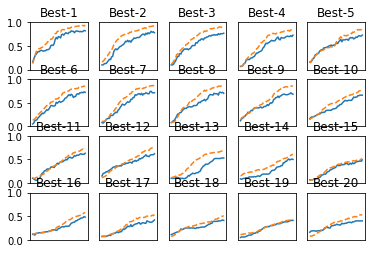

In [38]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from multi_layer_net import MultiLayerNet
from util import shuffle_dataset
from trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
